### Full run with conduino, probes ANK1 and ANK2, high N

Probe ANK1 upstream and ANK2 downstream, both near canyons heads and no dye. Profiler probe P.


In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
def time2dist(max_depth, time):
    '''Convert time of measurement to distance - Not correct yet because 
    profiles goes faster at the top and slower at the bottom 
    so dt to dx conversion factor is not constant '''
    depth = np.zeros(np.shape(time))
    time_norm = time-time[0]
    depth = (time_norm * max_depth) / np.max(time_norm)
    return(depth)

def densP(reading):
    ''' Calibration from 20 feb 2019 in probesBCP_20feb19.ipynb. Returns density fitted using a 3rd deg polynomial.
    Input - reading::array
    Output - fitP::array of size [reading]'''
    fitP = 0.998397+(0.004542*reading)+(0.000282*reading**2) + (0.000347*reading**3)
    return(fitP)

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P|



In [15]:
def dens_ANK1(read):
    rho_1 = 0.982926+0.019265*read-0.004250*read**2+0.000670*read**3 
    return(rho_1)

def dens_ANK2(read):
    rho_2 = 0.982289+0.041039*read-0.010799*read**2+0.002785*read**3 
    return(rho_2)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        

### All readings 

../../exp_26mar19/profiler_initial.mat
../../exp_26mar19/checkup_12_30.mat
../../exp_26mar19/checkup_13_30.mat
../../exp_26mar19/checkup_13_53.mat
../../exp_26mar19/experiment.mat
../../exp_26mar19/profile_final.mat


Text(0.5,0,'time / s')

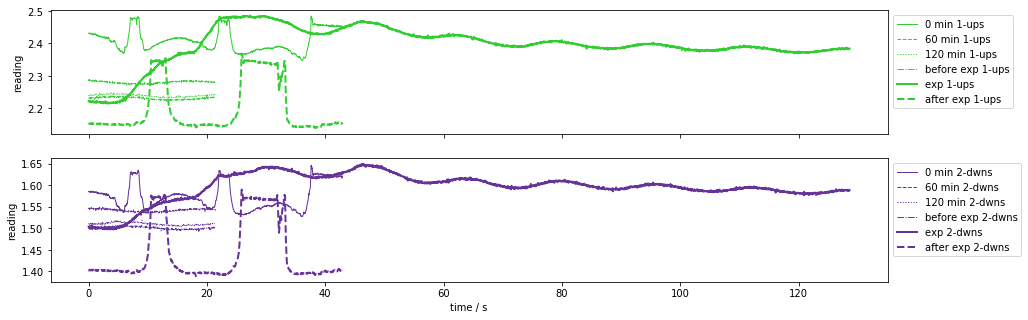

In [10]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels1 = ['0 min 1-ups','60 min 1-ups','120 min 1-ups','before exp 1-ups','exp 1-ups','after exp 1-ups']
labels2 = ['0 min 2-dwns','60 min 2-dwns','120 min 2-dwns','before exp 2-dwns','exp 2-dwns','after exp 2-dwns']

colors = ['limegreen','rebeccapurple','orangered']

filepaths = ['../../exp_26mar19/profiler_initial.mat',
             '../../exp_26mar19/checkup_12_30.mat',
             '../../exp_26mar19/checkup_13_30.mat',
             '../../exp_26mar19/checkup_13_53.mat',
             '../../exp_26mar19/experiment.mat',
             '../../exp_26mar19/profile_final.mat']

lines = ['-','--',':','-.','-','--']
linewidths = [1,1,1,1,2,2]

for filepath, line, linew, lab1, lab2 in zip(filepaths, lines, linewidths, labels1, labels2):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    ax0.plot(time,P1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax1.plot(time,P2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')

ax1.set_xlabel('time / s')


../../exp_26mar19/profiler_initial.mat
../../exp_26mar19/experiment.mat
../../exp_26mar19/profile_final.mat


Text(0.5,0,'time / s')

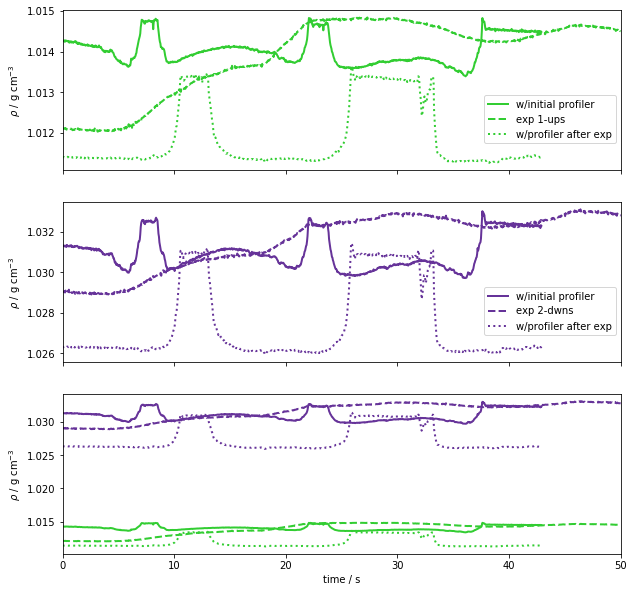

In [36]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,10), sharex=True)

labels1 = ['w/initial profiler','exp 1-ups','w/profiler after exp']
labels2 = ['w/initial profiler','exp 2-dwns','w/profiler after exp']

colors = ['limegreen','rebeccapurple','orangered','blue']

filepaths = ['../../exp_26mar19/profiler_initial.mat',
             '../../exp_26mar19/experiment.mat',
             '../../exp_26mar19/profile_final.mat']

lines = ['-','--',':','-.','-','--']
linewidths = [2,2,2,2,2,2]

for filepath, line, linew, lab1, lab2 in zip(filepaths, lines, linewidths, labels1, labels2):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1'] 
    P2 = mat['ch2'] 
    density_1 = dens_ANK1(P1)
    density_2 = dens_ANK2(P2)
    
    time = mat['time']
    ax0.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax1.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    ax2.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax2.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    
ax0.legend(bbox_to_anchor=(1,0.5))
ax1.legend(bbox_to_anchor=(1,0.5))

ax0.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax1.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')

ax0.set_xlim(0,50)
ax1.set_xlim(0,50)
ax2.set_xlim(0,50)

ax2.set_xlabel('time / s')

### Profiles

11


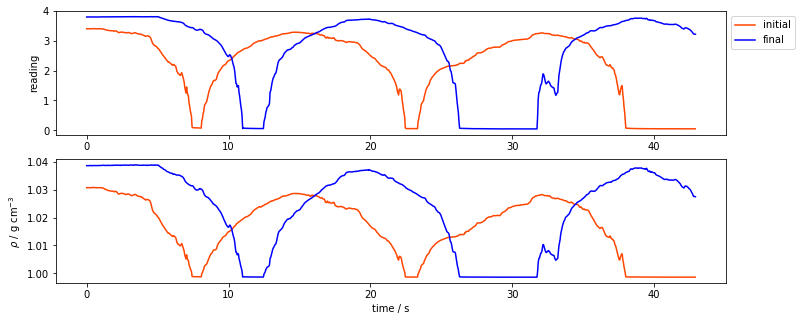

In [43]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))

filepath_ini = '../../exp_26mar19/profiler_initial.mat'
filepath_fin = '../../exp_26mar19/profile_final.mat'

mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini = mat_ini['time']
time_fin = mat_fin['time']

ax1.plot(time_ini,P_ini, label='initial', color=colors[2])
ax1.plot(time_fin,P_fin, label='final', color=colors[3])
ax2.plot(time_ini,dens_P_ini, label='initial', color=colors[2])
ax2.plot(time_fin,dens_P_fin, label='final', color=colors[3])

ax1.legend(bbox_to_anchor=(1,1))
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_xlabel('time / s')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')
print(np.argmax(PP))

### Experiment

../../exp_26mar19/experiment.mat


Text(0.5,0,'sample')

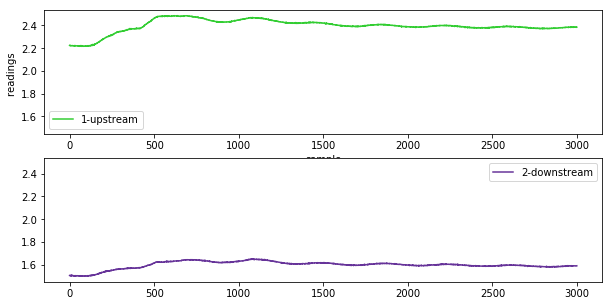

In [17]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']

filepath = '../../exp_26mar19/experiment.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
P1 = mat['ch1']
P2 = mat['ch2']
time = mat['time']
ax0.plot(P1,'-', label=labels[0], color=colors[0])
ax1.plot(P2,'-', label=labels[1], color=colors[1])


ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax0.set_xlabel('sample')

Text(0.5,1,'Probe density minus initial density')

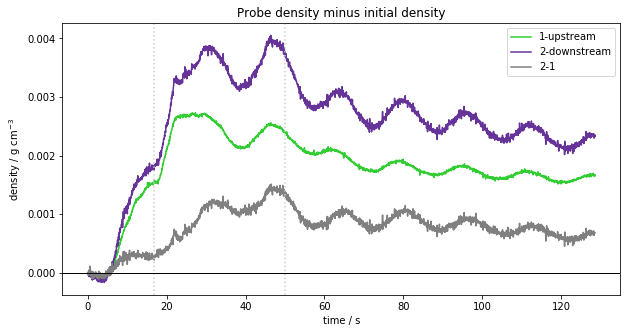

In [18]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label=labels[1], color=colors[1])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='2-1', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')
